In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv('Iris.csv',index_col=0)

In [13]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


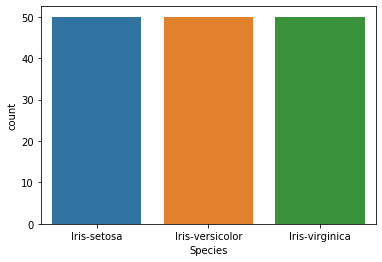

In [17]:
sns.countplot(x='Species', data=df)

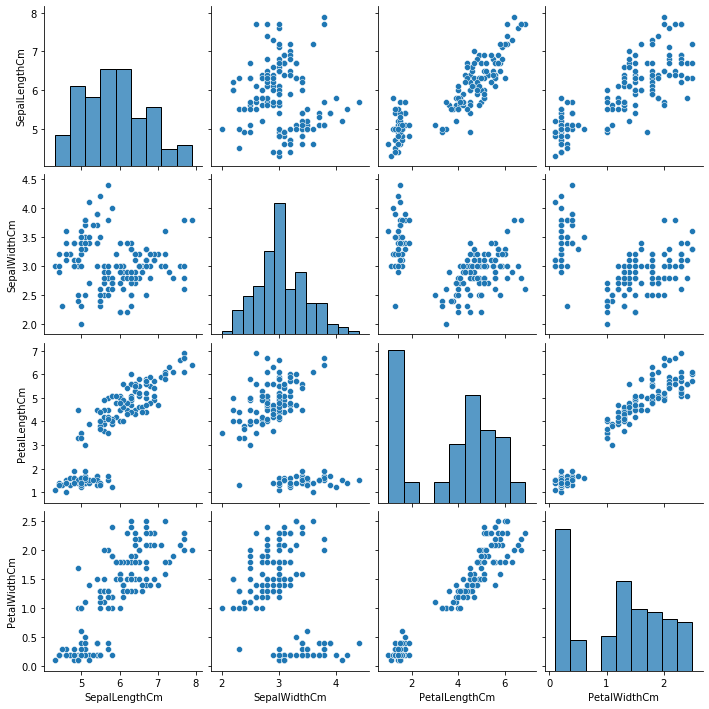

In [18]:
sns.pairplot(df)

In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
#To use the categorical features, we need to convert the categorical features to binary using pandas get dummies.

categorical_features = ['Species']
continuous_features =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0


In [22]:
#To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s 
#MinMaxScaler as the feature matrix is a mix of binary and continuous features 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [23]:
data_transformed

array([[0.22222222, 0.625     , 0.06779661, ..., 1.        , 0.        ,
        0.        ],
       [0.16666667, 0.41666667, 0.06779661, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.05084746, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61111111, 0.41666667, 0.71186441, ..., 0.        , 0.        ,
        1.        ],
       [0.52777778, 0.58333333, 0.74576271, ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.41666667, 0.69491525, ..., 0.        , 0.        ,
        1.        ]])

In [24]:
#For each k value, we will initialise k-means and use the inertia attribute to 
#identify the sum of squared distances of samples to the nearest cluster centre.

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


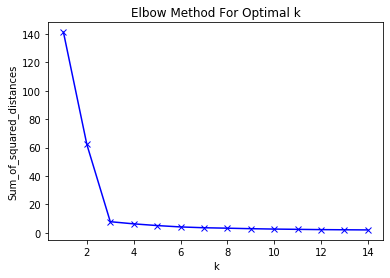

In [25]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#If the plot looks like an arm, then the elbow on the arm is optimal k.